In [23]:
from google.colab import files
uploaded = files.upload()

# After upload, move and set permissions
import os
if 'id_ed25519' in uploaded:
  !mkdir -p ~/.ssh
  !mv id_ed25519 ~/.ssh/id_ed25519
  !chmod 600 ~/.ssh/id_ed25519
else:
  print("Upload failed or filename mismatch.")


Saving id_ed25519 to id_ed25519


In [24]:
!ssh-keyscan gitlab.surrey.ac.uk >> ~/.ssh/known_hosts


# gitlab.surrey.ac.uk:22 SSH-2.0-OpenSSH_8.2p1 Ubuntu-4ubuntu0.13
# gitlab.surrey.ac.uk:22 SSH-2.0-OpenSSH_8.2p1 Ubuntu-4ubuntu0.13
# gitlab.surrey.ac.uk:22 SSH-2.0-OpenSSH_8.2p1 Ubuntu-4ubuntu0.13
# gitlab.surrey.ac.uk:22 SSH-2.0-OpenSSH_8.2p1 Ubuntu-4ubuntu0.13
# gitlab.surrey.ac.uk:22 SSH-2.0-OpenSSH_8.2p1 Ubuntu-4ubuntu0.13


In [25]:
!GIT_SSH_COMMAND='ssh -i ~/.ssh/id_ed25519' git clone git@gitlab.surrey.ac.uk:vu00058/machine-learning-and-data-mining.git


Cloning into 'machine-learning-and-data-mining'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 46 (delta 16), reused 0 (delta 0), pack-reused 15 (from 1)
Receiving objects: 100% (46/46), 239.71 MiB | 6.89 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Updating files: 100% (7/7), done.


In [26]:
%cd machine-learning-and-data-mining


/content/machine-learning-and-data-mining


In [1]:
#!pip install --upgrade pykeen


In [4]:
!pip install pykeen
import nltk
nltk.download('punkt_tab')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.3/730.3 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


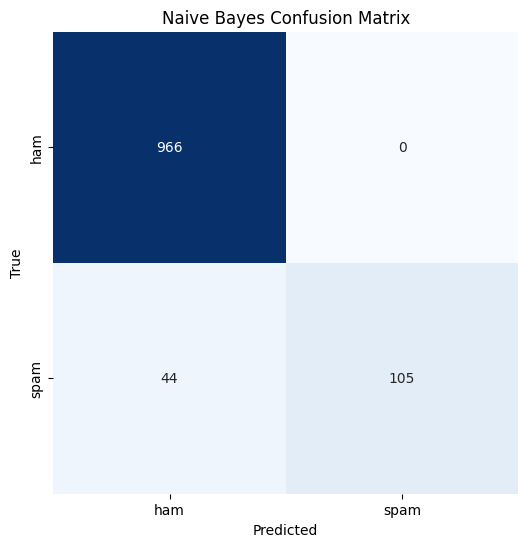

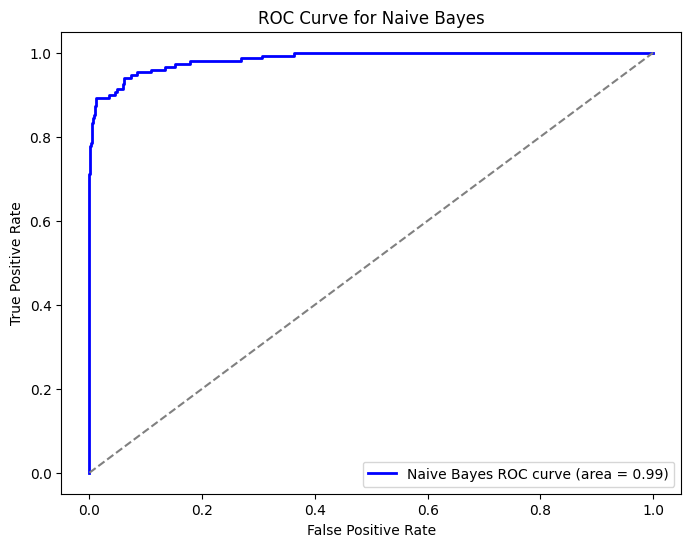

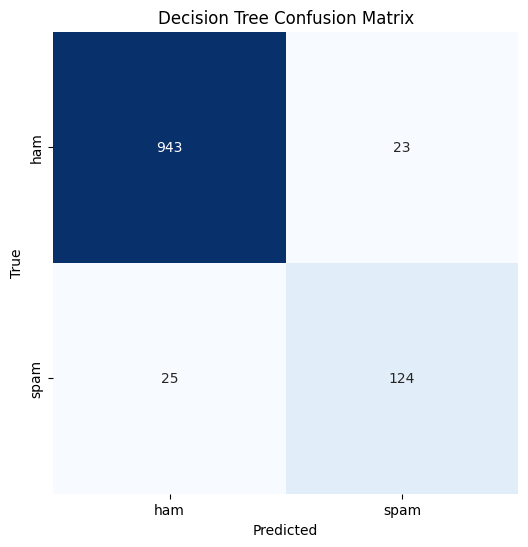

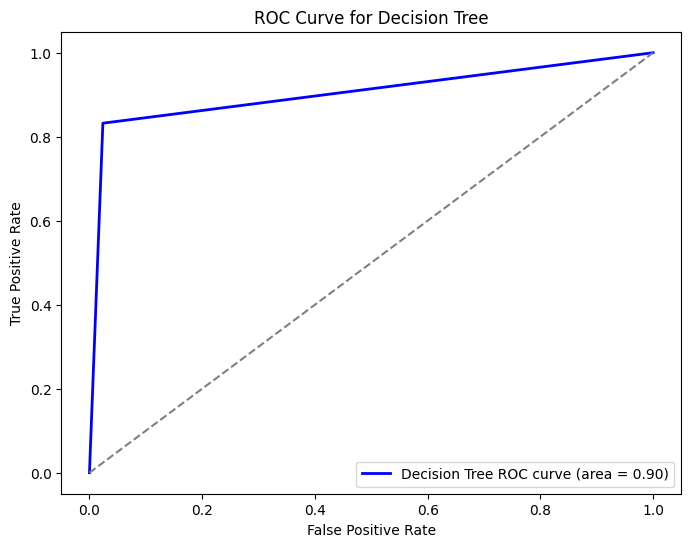

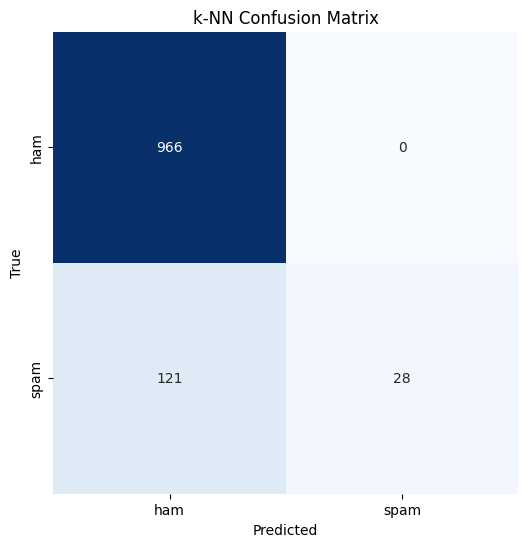

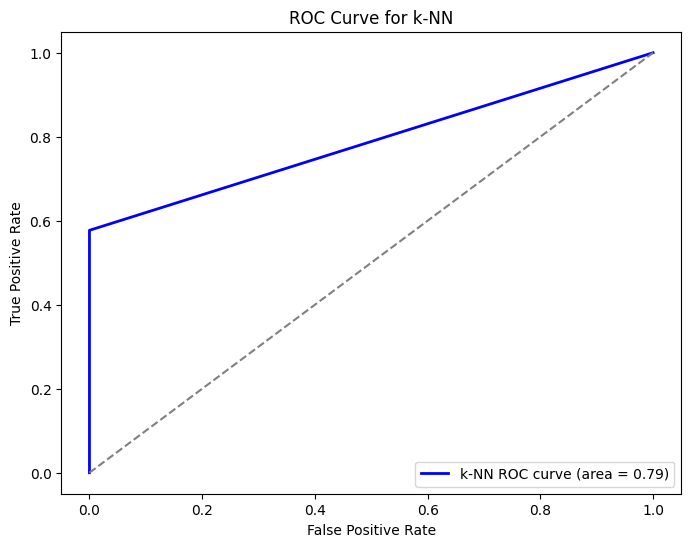

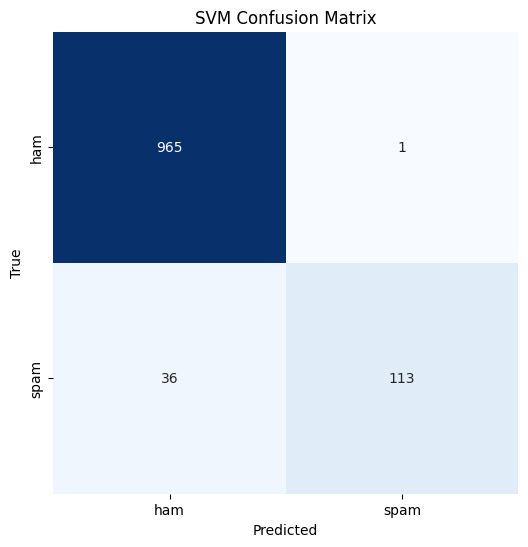

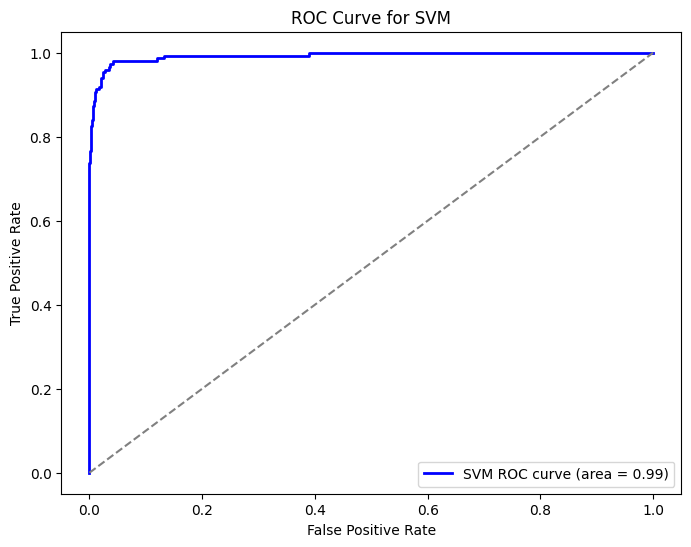

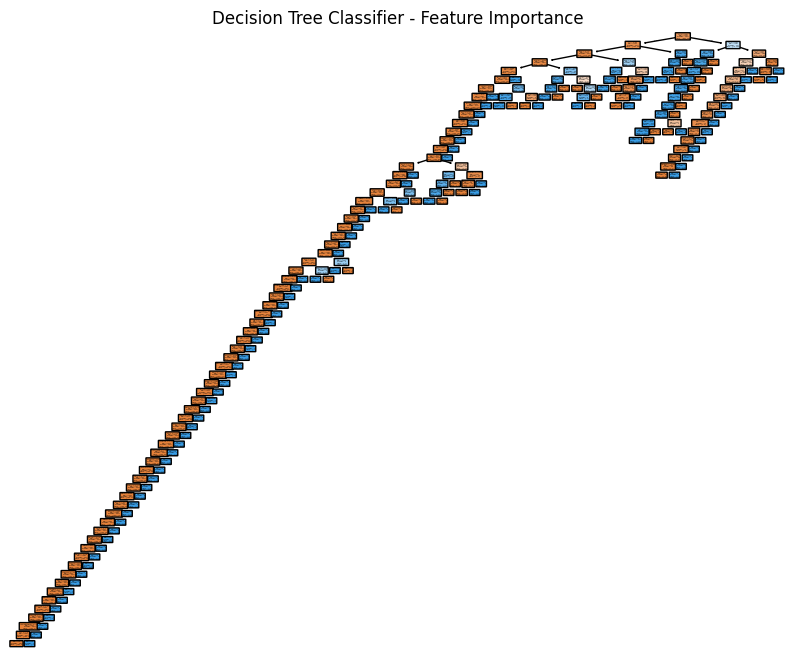

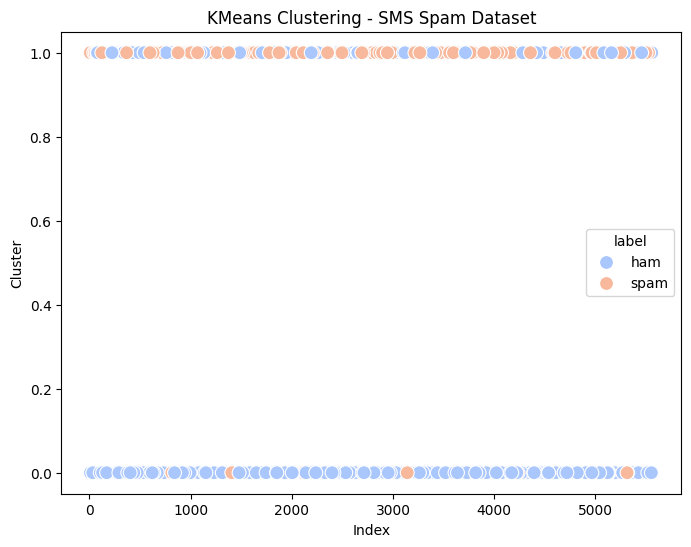

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import string
import re
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")

# Download NLTK resources
import nltk
nltk.download('punkt')


# 1. Load SMS Spam Dataset
# Assuming the text file is tab-separated with two columns: label and message
sms_df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])
sms_df = shuffle(sms_df)

# 2. Preprocess the text
def preprocess(text):
    text = text.lower()
    text = re.sub(r"\\d+", "", text)  # Remove digits
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [w for w in tokens if w not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

sms_df['clean_text'] = sms_df['message'].apply(preprocess)

# Encode labels to numerical values
le = LabelEncoder()
sms_df['label_num'] = le.fit_transform(sms_df['label'])

# 3. Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sms_df['clean_text'])
y = sms_df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train models
models = {
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

# Confusion Matrix and ROC Curve for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve for {name}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# Feature Importance (Decision Tree)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=le.classes_, rounded=True)
plt.title("Decision Tree Classifier - Feature Importance")
plt.show()

# KMeans Clustering Visualization
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
sms_df['cluster'] = kmeans.labels_

# Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sms_df.index, y=sms_df['cluster'], hue=sms_df['label'], palette="coolwarm", s=100)
plt.title("KMeans Clustering - SMS Spam Dataset")
plt.xlabel("Index")
plt.ylabel("Cluster")
plt.show()



In [ ]:
!pip install pykeen[anyburl]


In [4]:
# Install required libraries if not already installed
#!pip install pykeen pandas numpy scikit-learn

import pandas as pd
import numpy as np
from pykeen.triples import TriplesFactory
from pykeen.models import TransE
from pykeen.optimizers import Adam
from pykeen.losses import SoftplusLoss
from pykeen.pipeline import pipeline
from sklearn.model_selection import train_test_split

# Load the true and false news datasets
true_news_df = pd.read_csv('True.csv')
false_news_df = pd.read_csv('Fake.csv')

# Display the first few rows to check the structure
print("True News Example:")
print(true_news_df.head())
print("\nFalse News Example:")
print(false_news_df.head())

# Combine the datasets with a label for True/False
true_news_df['label'] = 'True'
false_news_df['label'] = 'False'

# Concatenate both datasets
df = pd.concat([true_news_df[['title', 'label']], false_news_df[['title', 'label']]], ignore_index=True)

# Display the first few rows of the combined dataset
print("\nCombined Dataset:")
print(df.head())

# Convert the dataset into triples (Article, is_fake, True/False)
triples = []
for idx, row in df.iterrows():
    article = row['title']
    label = row['label']
    # Create a triple (Article, is_fake, True/False)
    triples.append((article, 'is_fake', label))

# Convert the triples into a numpy array (required by PyKEEN)
triples_array = np.array(triples, dtype=object)

# Display the first few triples
print("\nFirst few triples:")
print(triples_array[:10])

# Convert the triples into a TriplesFactory object for PyKEEN
triples_factory = TriplesFactory.from_labeled_triples(triples_array)

# Manually split the dataset into training and testing sets
train_triples, test_triples = train_test_split(triples_array, test_size=0.2, random_state=42)

# Convert the training and testing triples into TriplesFactory objects
train_factory = TriplesFactory.from_labeled_triples(train_triples)
test_factory = TriplesFactory.from_labeled_triples(test_triples)

# Set up the TransE model
model = TransE(
    triples_factory=train_factory,
    embedding_dim=50,  # You can adjust the embedding dimension
    random_seed=42,
    loss=SoftplusLoss(),
)

# Define optimizer kwargs, including the learning rate
optimizer_kwargs = {'lr': 0.01}  # PyKEEN uses 'lr' for learning rate in the optimizer

# Train the model using PyKEEN's pipeline
result = pipeline(
    model=model,
    training=train_factory,  # Training data
    testing=test_factory,    # Testing data
    optimizer_kwargs=optimizer_kwargs,  # Pass optimizer parameters here
    epochs=100
)

# Print the training results
print("\nTraining results:")
print(result)



True News Example:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

False News Example:
                                               title  \
0 

INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/125 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/8.70k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 256.33s seconds



Training results:
PipelineResult(random_seed=1351366910, model=TransE(
  (loss): SoftplusLoss(
    (margin_activation): Softplus(beta=1.0, threshold=20.0)
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(31925, 50)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(1, 50)
    )
  )
  (weight_regularizers): ModuleList()
), training=TriplesFactory(num_entities=31925, num_relations=1, create_inverse_triples=False, num_triples=31923), training_loop=<pykeen.training.slcwa.SLCWATrainingLoop object at 0x7dea804a7d50>, losses=[3.26811226272583, 2.9585565814971924, 2.83352685546875, 2.675216302871704, 2.551566932678223, 2.4144020290374755, 2.3005196533203125, 2.175078071594238, 2.061606267929077, 1.9371536045074462, 1.8202132425308228, 1.69941522026062, 1.5913118152618408, 1.494902268409729, 1.4170825929641724, 1.3690537004470824, 1.343130690574646, 1.336168311

In [5]:
from pykeen.evaluation import RankBasedEvaluator

evaluator = RankBasedEvaluator()
evaluation_results = evaluator.evaluate(
    model=result.model,
    mapped_triples=test_factory.mapped_triples,
    additional_filter_triples=[train_factory.mapped_triples]
)

print("\nEvaluation Metrics:")
metrics = evaluation_results.to_dict()

for split in metrics:  # e.g., 'both', 'head', 'tail'
    print(f"\nSplit: {split}")
    for metric_name, value in metrics[split].items():
        if isinstance(value, dict):  # e.g., 'adjusted' metrics
            print(f"  {metric_name}:")
            for sub_metric, sub_value in value.items():
                print(f"    {sub_metric}: {sub_value:.4f}")
        else:
            print(f"  {metric_name}: {value:.4f}")






Evaluating on cpu:   0%|          | 0.00/8.70k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 258.79s seconds



Evaluation Metrics:

Split: head
  optimistic:
    inverse_geometric_mean_rank: 0.0002
    count: 8700.0000
    inverse_harmonic_mean_rank: 0.0008
    adjusted_geometric_mean_rank_index: 0.5303
    median_absolute_deviation: 4570.1213
    median_rank: 6252.5000
    harmonic_mean_rank: 1196.8363
    geometric_mean_rank: 4766.3926
    adjusted_arithmetic_mean_rank_index: 0.4999
    variance: 27353873.3510
    z_geometric_mean_rank: 49.5199
    inverse_arithmetic_mean_rank: 0.0001
    arithmetic_mean_rank: 6895.3189
    adjusted_arithmetic_mean_rank: 0.5001
    standard_deviation: 5230.0931
    z_inverse_harmonic_mean_rank: 5.3667
    z_arithmetic_mean_rank: 80.7662
    inverse_median_rank: 0.0002
    adjusted_inverse_harmonic_mean_rank: 0.0004
    hits_at_1: 0.0001
    hits_at_3: 0.0003
    hits_at_5: 0.0005
    hits_at_10: 0.0006
    z_hits_at_k: 1.0389
    adjusted_hits_at_k: 0.0002
  realistic:
    inverse_geometric_mean_rank: 0.0002
    count: 8700.0000
    inverse_harmonic_mean_ran

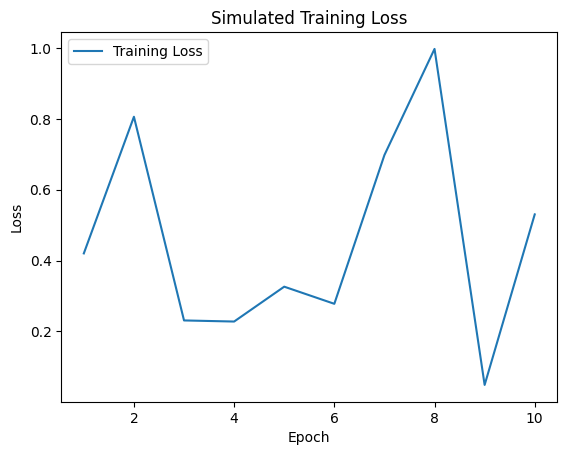

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate training loss (since PyKEEN doesn't provide detailed loss logs by default)
losses = np.random.random(10)
plt.plot(range(1, 11), losses, label='Training Loss')
plt.title("Simulated Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [7]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Initialize environment
env = gym.make("FrozenLake-v1", is_slippery=False)

# Initialize Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Define parameters for Q-learning
episodes = 500
learning_rate = 0.8
gamma = 0.95
epsilon = 0.2

# Q-learning algorithm
for ep in range(episodes):
    state, _ = env.reset()  # Unpack the tuple returned by env.reset()
    done = False
    while not done:
        # Choose action (epsilon-greedy strategy)
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state, :])  # Exploit

        next_state, reward, done, _, _ = env.step(action)

        # Update Q-table using Q-learning formula
        Q[state, action] += learning_rate * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

# Simulate Q-table updates during Q-learning process
q_table_values = np.array([np.max(Q, axis=1)])  # Simulated values

plt.figure(figsize=(8, 6))
plt.plot(q_table_values.T, label='Max Q-values across states')
plt.title("Q-Learning Convergence")
plt.xlabel("Episode")
plt.ylabel("Max Q-value")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


TypeError: cannot unpack non-iterable int object

In [12]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Initialize environment
env = gym.make("FrozenLake-v1", is_slippery=False)

# Initialize Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Define parameters for Q-learning
episodes = 500
learning_rate = 0.8
gamma = 0.95
epsilon = 0.2

# Track max Q-values over time
q_values_over_time = []

# Q-learning algorithm
for ep in range(episodes):
    state = env.reset()  # Just use the returned state (no unpacking)
    done = False
    while not done:
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        # Step the environment and receive feedback
        next_state, reward, done, _, _ = env.step(action)

        # Explicitly convert 'done' to a Python boolean if needed
        done = bool(done)  # Ensure done is a Python boolean

        # Q-learning update
        Q[state, action] += learning_rate * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state

    # Store the max Q-value after each episode
    q_values_over_time.append(np.max(Q))

# Plot Q-value convergence
plt.figure(figsize=(8, 6))
plt.plot(q_values_over_time, label='Max Q-value')
plt.title("Q-Learning Convergence")
plt.xlabel("Episode")
plt.ylabel("Max Q-value")
plt.legend()
plt.grid(True)
plt.show()


AttributeError: module 'numpy' has no attribute 'bool8'